[View in Colaboratory](https://colab.research.google.com/github/SakshiPriya/autoencoder/blob/master/autoencoder.ipynb)

In [0]:

!pip install torch 
!pip install torchvision
!pip install pillow==4.0.0

In [0]:
 !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
 !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
 !apt-get update -qq 2>&1 > /dev/null
 !apt-get -y install -qq google-drive-ocamlfuse fuse
 from google.colab import auth
 auth.authenticate_user()
 from oauth2client.client import GoogleCredentials
 creds = GoogleCredentials.get_application_default()
 import getpass
 !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
 vcode = getpass.getpass()
 !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt



In [0]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Lambda(lambda tensor:torch.round(tensor))])
trainset=datasets.MNIST('drive/app',train=True,download=True,transform=transform)
trainloader=DataLoader(trainset,batch_size=128,shuffle=True,num_workers=2)


In [0]:
a=iter(trainloader)
def show_img(image):
  untransform=transforms.ToPILImage()
  image=untransform(image)
  plt.imshow(image)
  





In [9]:
class autoencoder(nn.Module):
  def __init__(self):
    super(autoencoder,self).__init__()
    self.encoder=nn.Sequential(nn.Linear(28*28,256),nn.ReLU(True),nn.Linear(256,64),nn.ReLU(True))
    self.decoder=nn.Sequential(nn.Linear(64,256),nn.ReLU(True),nn.Linear(256,28*28),nn.Sigmoid())
  def forward(self,x):
    x=self.decoder(self.encoder(x))
    return x

device="cuda" if torch.cuda.is_available() else "cpu"
ae=autoencoder()
ae.to(device)  

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): ReLU(inplace)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=256, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

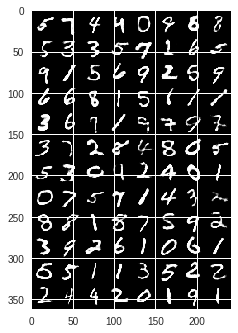

In [10]:
num_epoch=100
optimizer=optim.Adam(ae.parameters(),lr=0.01)
criterion=nn.BCELoss()
for i in range(num_epoch):
  for batch in trainloader:
    dtype=torch.cuda.FloatTensor
    img=batch[0].view(batch[0].size()[0],-1)
    img=img.type(dtype)
    img.to(device)
    optimizer.zero_grad()
    out=ae(img)
    
    loss=criterion(out,img)
    loss.backward()
    optimizer.step()
  
    
    
plt.figure()
out=out.cpu().clone()
out=out.view(out.size()[0],1,28,28)
show_img(torchvision.utils.make_grid(out))
plt.show()
